In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Generating dataset for test
#-----------------------------------------------

from sklearn.datasets import make_regression

X, y = make_regression(n_features=20, noise=10)

In [3]:
# Mean squared error function
#-----------------------------------------------

def mse(y: np.array, yp: np.array):
    """
        y: True values
        yp: Predicted values
    """

    return ((y - yp) ** 2).mean()

### Linear Regression

The following is an implementation of linear regression.

In [4]:
class LinearRegression:
    
    def __init__(self, intercept: bool):
        """
            intercept: if True, the model contains bias
        """
        
        self.__intercept = intercept
        self.__weight = None

    # Model training
    def train(self, _X: np.array, _y: np.array):
        """
            _X: Design matrix
            _y: Target
        """

        X = np.hstack( (np.ones((_X.shape[0],1)), _X) ) if self.__intercept else _X.copy()
        y = _y.copy()
        self.__weight = np.linalg.inv( X.T.dot(X) ).dot(X.T).dot(y)
    
    # Parameters getter
    def params(self):
        return self.__weight

    # Prediction
    def predict(self, _x: np.array):
        """
            _x: Design matrix
        """
        if len(_x.shape) == 1:
            x = np.hstack( (1, _x) ) if self.__intercept else _x.copy()
            return self.__weight.dot(x)
        else:
            x = np.hstack( (np.ones((_x.shape[0],1)), _x) ) if self.__intercept else _x.copy()
            return x.dot(self.__weight)

Let us test the model.

In [62]:
linReg = LinearRegression(intercept=True)
linReg.train(X, y)

print("MSE: ", mse(y, linReg.predict(X)))

MSE:  54.351167304651725


### Ridge

The following is an implementation of ridge.

In [63]:
class Ridge:
    
    def __init__(self, intercept: bool, coeff: float):
        """
            intercept: if True, the model contains bias
            coeff: ridge lambda
        """
        
        self.__coeff = coeff
        self.__intercept = intercept
        self.__weight = None

    # Model training
    def train(self, _X: np.array, _y: np.array):
        """
            _X: Design matrix
            _y: Target
        """

        X = np.hstack( (np.ones((_X.shape[0],1)), _X) ) if self.__intercept else _X.copy()
        y = _y.copy()
        M = X.T.dot(X) + self.__coeff * np.identity(X.shape[1])
        self.__weight = np.linalg.inv( M ).dot(X.T).dot(y)
    
    # Parameters getter
    def params(self):
        return self.__weight
        
    # Prediction
    def predict(self, _x: np.array):
        """
            _x: Design matrix
        """
        
        if len(_x.shape) == 1:
            x = np.hstack( (1, _x) ) if self.__intercept else _x.copy()
            return self.__weight.dot(x)
        else:
            x = np.hstack( (np.ones((_x.shape[0],1)), _x) ) if self.__intercept else _x.copy()
            return x.dot(self.__weight)

Let us test the model.

In [64]:
linReg = Ridge(intercept=True, coeff=0.4)
linReg.train(X, y)

print("MSE: ", mse(y, linReg.predict(X)))

MSE:  54.890366278548356


### Plot Function

The following functions makes a barplot showing the frequencies of the first digit in each number.

In [65]:
def plot(X):
    
    arr = []
    for x in X:
        if x >= 1:
            while x / 10 >= 1:
                x /= 10
        elif x < 1 and x != 0:
            while x < 1:
                x *= 10
        arr.append(int(x))
    
    pd.Series(arr).value_counts().sort_index().plot.bar()

We will now use the defined function on a few data.

In [66]:
def process(x):
    if isinstance(x, str):
        x = re.sub("\D", "", x)
    try:
        return float(x)
    except:
        return np.nan

/tmp/ipykernel_5864/1283184347.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  _df = pd.read_csv(path + "covid.csv").groupby("Country/Region").sum()


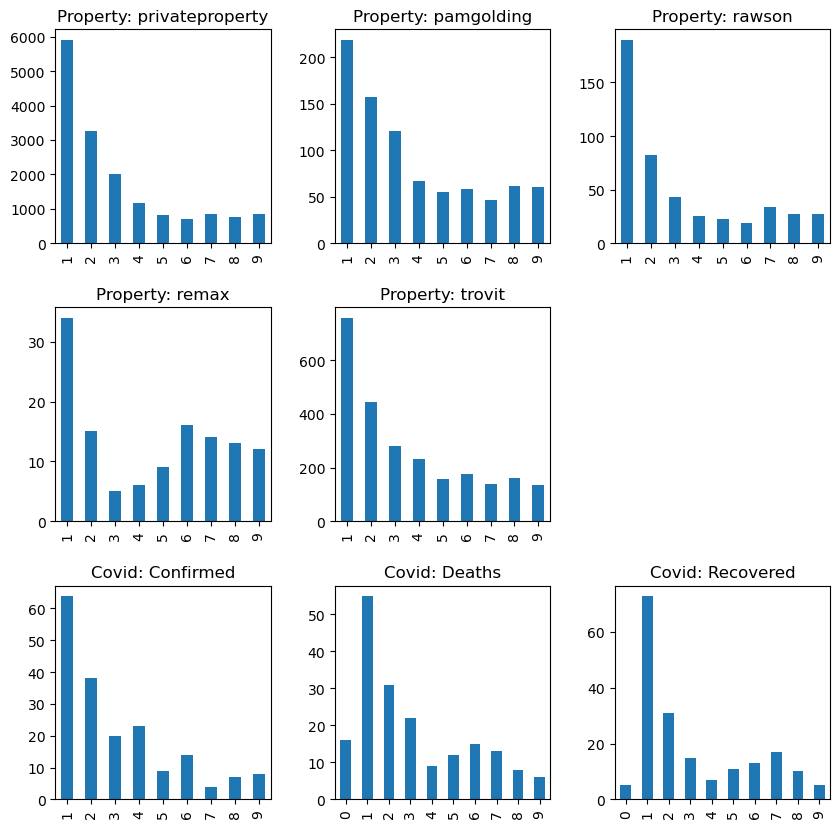

In [74]:
path = "../data/"
property = ["privateproperty", "pamgolding", "rawson", "remax", "trovit"]

plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

for i in range(len(property)):
    _df = pd.read_csv(path + property[i] + ".csv")
    _y = _df.Price.apply(process).dropna()

    plt.subplot(3, 3, i+1)
    plt.title("Property: " + property[i])
    plot(_y)

covid = ["Confirmed", "Deaths", "Recovered"]

_df = pd.read_csv(path + "covid.csv").groupby("Country/Region").sum()
for i in range(len(covid)):
    _y = _df[covid[i]].dropna()

    plt.subplot(3, 3, i+7)
    plt.title("Covid: " + covid[i])
    plot(_y)

---